In [15]:
from rdkit import Chem
import rdkit
print(rdkit.__version__)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (500,500)
IPythonConsole.ipython_maxProperties = -1
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize


2023.03.3


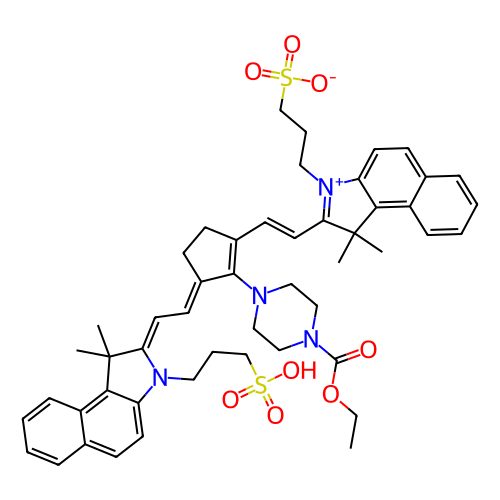

In [12]:
#iterate sdf again
mols = Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf')
#get our example mos with cas 54849-69-3
example_mol = [mol for mol in mols if mol.GetProp('CAS') == '54849-69-3'][0]
example_mol

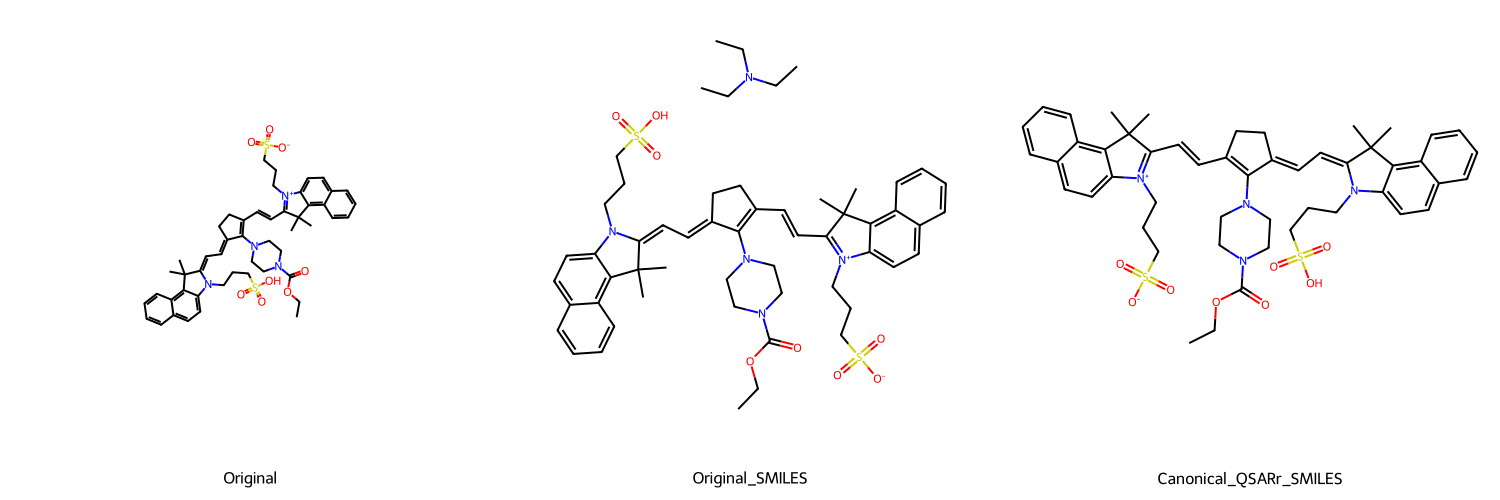

In [14]:
example_mol_from_Original_SMILES = Chem.MolFromSmiles(example_mol.GetProp('Original_SMILES'))
example_mol_from_Canonical_QSARr_SMILES = Chem.MolFromSmiles(example_mol.GetProp('Canonical_QSARr'))
#draw side by side
img = Draw.MolsToGridImage([example_mol,example_mol_from_Original_SMILES, example_mol_from_Canonical_QSARr_SMILES], molsPerRow=3, subImgSize=(500,500), legends=['Original', 'Original_SMILES', 'Canonical_QSARr_SMILES'])
img

[14:02:15] Initializing MetalDisconnector
[14:02:15] Running MetalDisconnector
[14:02:15] Initializing Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running LargestFragmentChooser
[14:02:15] Fragment: CCOC(=O)N1CCN(C2=C(/C=C/C3=[N+](CCCS(=O)(=O)[O-])c4ccc5ccccc5c4C3(C)C)CC/C2=C\C=C2/N(CCCS(=O)(=O)O)c3ccc4ccccc4c3C2(C)C)CC1
[14:02:15] New largest fragment: CCOC(=O)N1CCN(C2=C(/C=C/C3=[N+](CCCS(=O)(=O)[O-])c4ccc5ccccc5c4C3(C)C)CC/C2=C\C=C2/N(CCCS(=O)(=O)O)c3ccc4ccccc4c3C2(C)C)CC1 (122)
[14:02:15] Running Uncharger
[14:02:15] Initializing MetalDisconnector
[14:02:15] Running MetalDisconnector
[14:02:15] Initializing Normalizer
[14:02:15] Running Normalizer
[14:02:15] Initializing MetalDisconnector
[14:02:15] Running MetalDisconnector
[14:02:15] Initializing Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running LargestFragmentChooser
[14:02:15] Fragment: CCN(CC)CC
[14:02:15] New largest fragment: CCN(CC)CC (22)
[14:02:15] Fragment: CCOC(=O)N1CCN(C2=C(C=CC3=[N+](CCCS(=O)(=O)[O-])

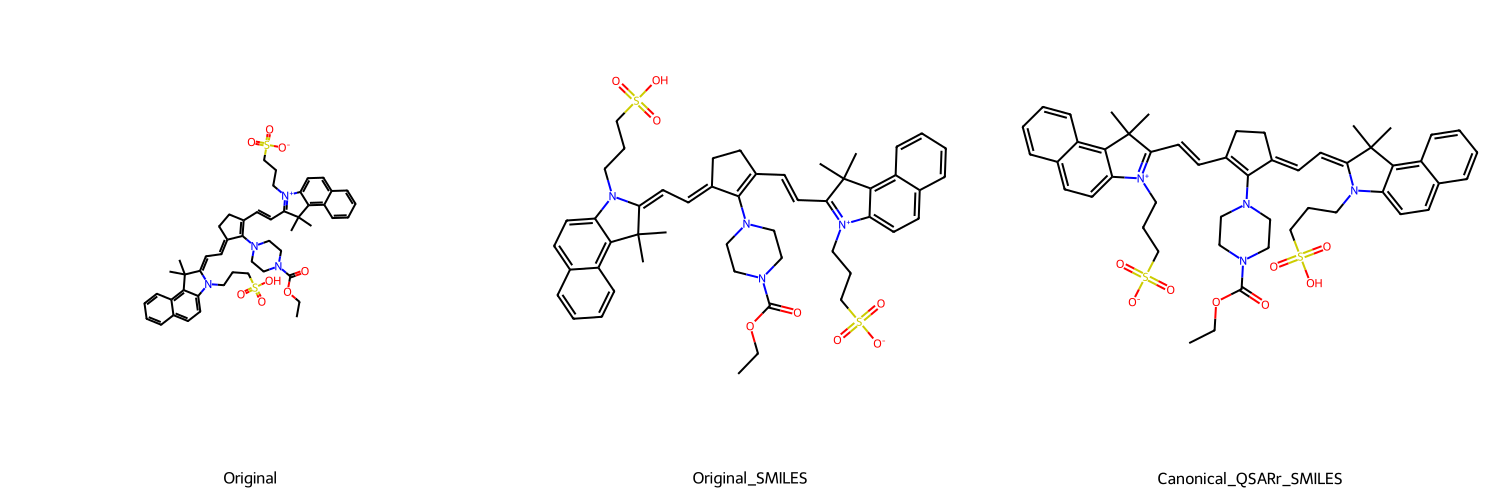

In [16]:
example_mol_standardized = rdMolStandardize.ChargeParent(example_mol)
example_mol_from_Original_SMILES_standardized = rdMolStandardize.ChargeParent(example_mol_from_Original_SMILES)
example_mol_from_Canonical_QSARr_SMILES_standardized = rdMolStandardize.ChargeParent(example_mol_from_Canonical_QSARr_SMILES)
#draw side by side
img = Draw.MolsToGridImage([example_mol_standardized,example_mol_from_Original_SMILES_standardized, example_mol_from_Canonical_QSARr_SMILES_standardized], molsPerRow=3, subImgSize=(500,500), legends=['Original', 'Original_SMILES', 'Canonical_QSARr_SMILES'])
img


In [19]:
#are they the same? how to check? inchikey?
example_mol_standardized_inchikey = Chem.MolToInchiKey(example_mol_standardized)
example_mol_from_Original_SMILES_standardized_inchikey = Chem.MolToInchiKey(example_mol_from_Original_SMILES_standardized)
example_mol_from_Canonical_QSARr_SMILES_standardized_inchikey = Chem.MolToInchiKey(example_mol_from_Canonical_QSARr_SMILES_standardized)
if example_mol_standardized_inchikey == example_mol_from_Original_SMILES_standardized_inchikey == example_mol_from_Canonical_QSARr_SMILES_standardized_inchikey:
    print('all the same')
else:
    print(example_mol_standardized_inchikey)
    print(example_mol_from_Original_SMILES_standardized_inchikey)
    print(example_mol_from_Canonical_QSARr_SMILES_standardized_inchikey)
#substructure match with chirality
match_example_vs_original_smiles = example_mol_standardized.HasSubstructMatch(example_mol_from_Original_SMILES_standardized, useChirality=True)
match_example_vs_canonical_smiles = example_mol_standardized.HasSubstructMatch(example_mol_from_Canonical_QSARr_SMILES_standardized, useChirality=True)
match_original_vs_qsarr_smiles = example_mol_from_Original_SMILES_standardized.HasSubstructMatch(example_mol_from_Canonical_QSARr_SMILES_standardized, useChirality=True)
print(match_example_vs_original_smiles)
print(match_example_vs_canonical_smiles)
print(match_original_vs_qsarr_smiles)


all the same
False
True
False


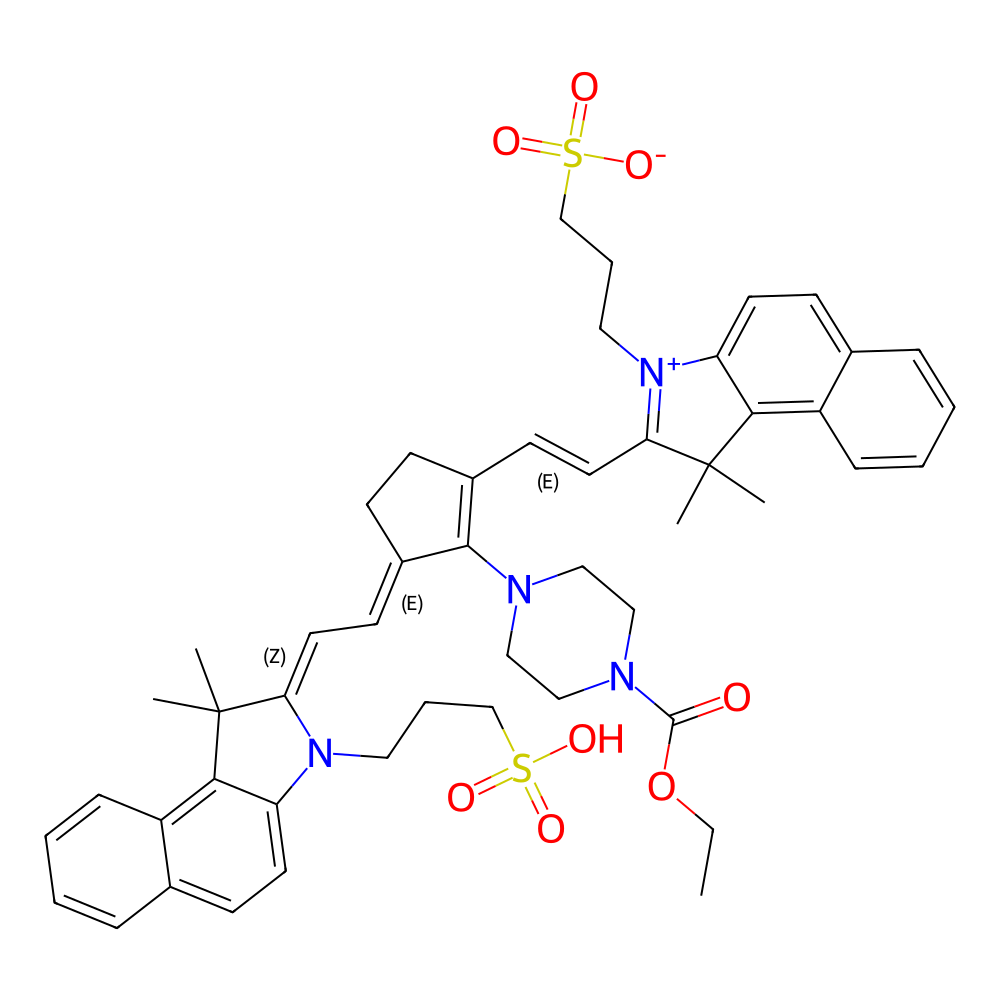

In [39]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
example_mol_standardized
d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DSVG to get SVGs
d.drawOptions().addStereoAnnotation = True
d.DrawMolecule(example_mol_standardized)
d.FinishDrawing()
SVG(d.GetDrawingText())


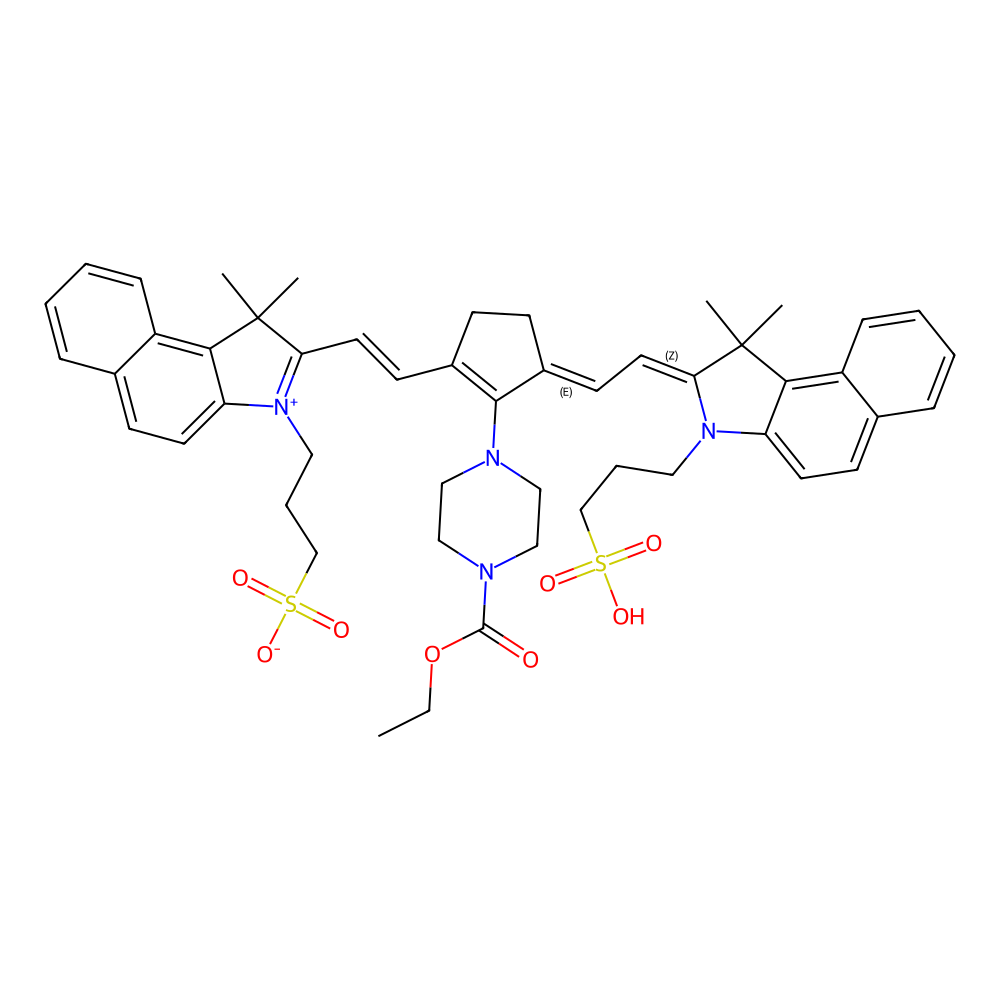

In [41]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DSVG to get SVGs
d.drawOptions().addStereoAnnotation = True
d.DrawMolecule(example_mol_from_Canonical_QSARr_SMILES_standardized)
d.FinishDrawing()
SVG(d.GetDrawingText())


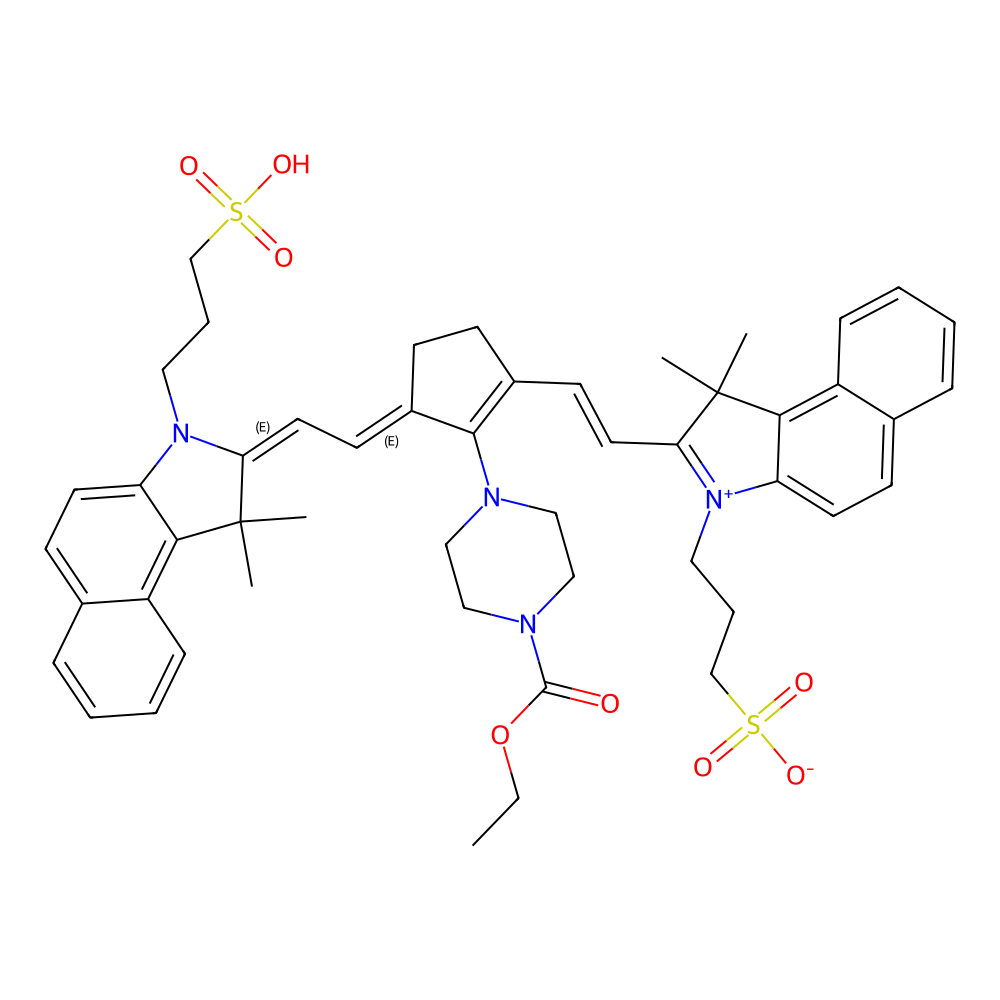

In [44]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DSVG to get SVGs
d.drawOptions().addStereoAnnotation = True
d.DrawMolecule(example_mol_from_Original_SMILES_standardized)
d.FinishDrawing()
SVG(d.GetDrawingText())



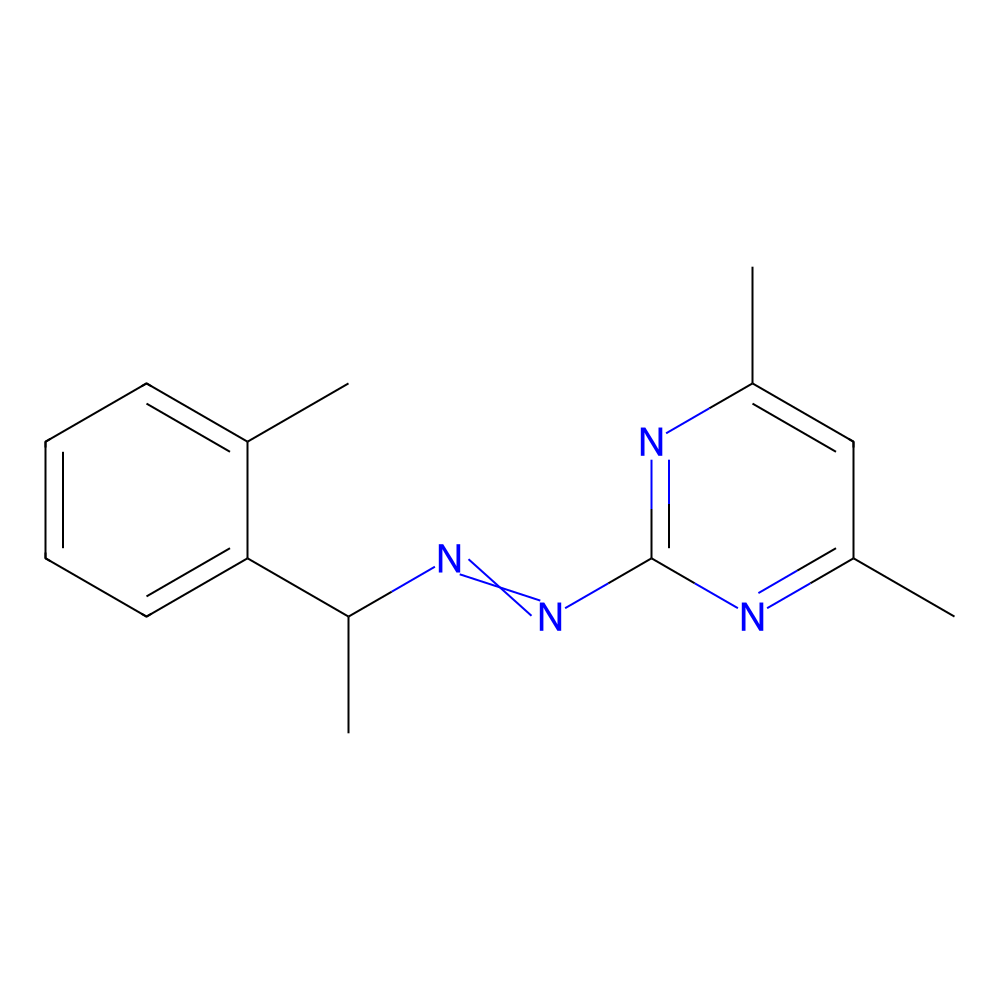

In [47]:
#another one
example_mol_2 = [mol for mol in mols if mol.GetProp('CAS') == '89269-64-7'][0]
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DSVG to get SVGs
d.drawOptions().addStereoAnnotation = True
d.DrawMolecule(example_mol_2)
d.FinishDrawing()
SVG(d.GetDrawingText())




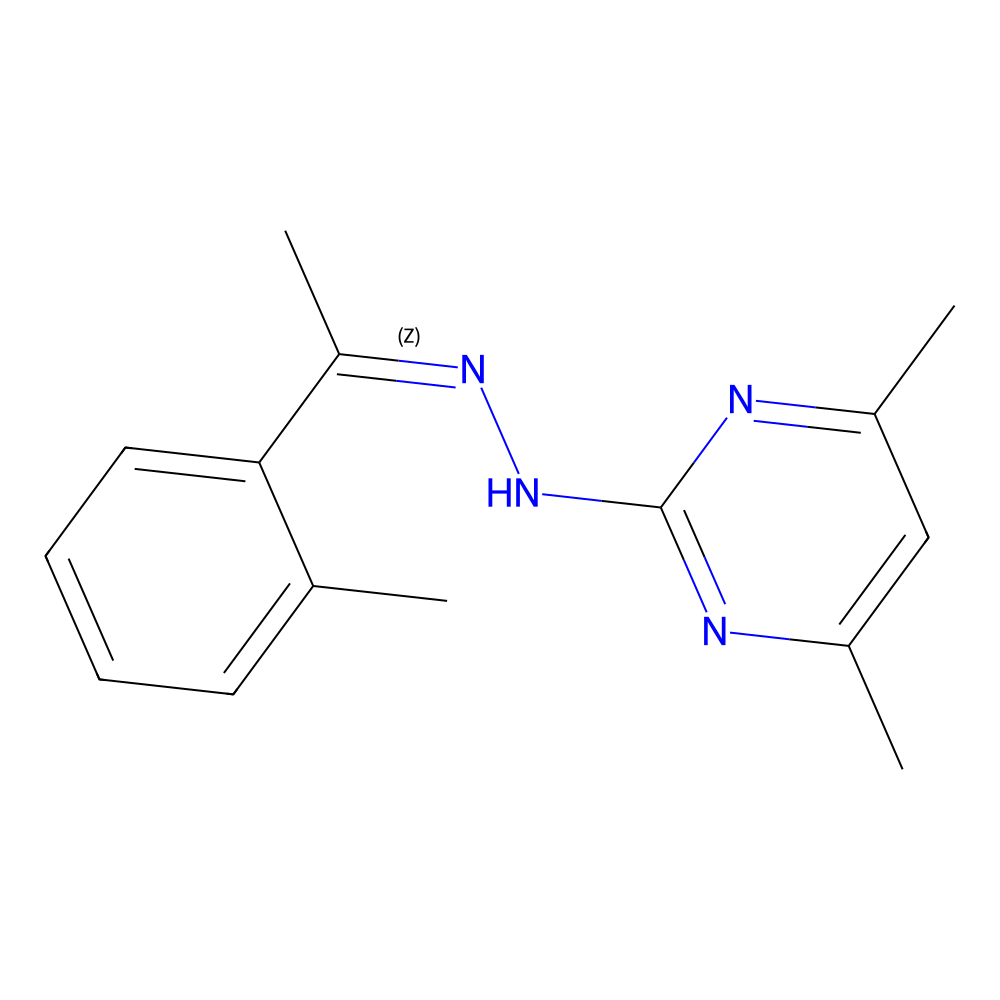

In [48]:
#another one
example_mol_2_from_original_smiles = Chem.MolFromSmiles(example_mol_2.GetProp('Original_SMILES'))
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DSVG to get SVGs
d.drawOptions().addStereoAnnotation = True
d.DrawMolecule(example_mol_2_from_original_smiles)
d.FinishDrawing()
SVG(d.GetDrawingText())


